In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [19]:
X_train.shape

(60000, 28, 28)

In [29]:
single_image=X_train[0]

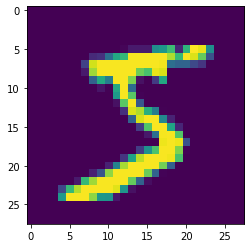

In [30]:
plt.imshow(single_image)

In [32]:
single_image.shape

(28, 28)

In [35]:
#we need to convert this into other form , else CNN will consider them continous value
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
y_train.shape

(60000,)

In [36]:
y_train_c=to_categorical(y_train)

In [38]:
y_train_c[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
y_test_c=to_categorical(y_test,num_classes=10) #we can specify the number of unique values

In [44]:
y_test_c[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [47]:
single_image.max()

255

In [48]:
single_image.min()

0

In [51]:
X_train=X_train/255

In [52]:
X_test=X_test/255

In [55]:
X_train.shape

(60000, 28, 28)

In [62]:
#batch size,width,height,color_channels
X_train=X_train.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28,1)

In [63]:
X_test.shape

(10000, 28, 28, 1)

In [87]:
model =Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu")) #NO NEED OF PADDING BECAUSE STRIDE IS 1
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [88]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [89]:
early_stop=EarlyStopping(monitor="val_loss",patience=1)

In [90]:
model.fit(X_train,y_train_c,epochs=10,callbacks=[early_stop],validation_data=(X_test,y_test_c))

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1452 - accuracy: 0.9559 - val_loss: 0.0499 - val_accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0514 - val_accuracy: 0.9831


In [85]:
y_test_c.shape

(10000, 10)

In [91]:
model.history.history

{'loss': [0.14521223306655884, 0.04744640737771988],
 'accuracy': [0.9558500051498413, 0.9854666590690613],
 'val_loss': [0.04991498216986656, 0.051438573747873306],
 'val_accuracy': [0.9828000068664551, 0.9830999970436096]}

In [92]:
metrics=pd.DataFrame(model.history.history)

In [93]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.145212,0.955850,0.049915,0.9828
1,0.047446,0.985467,0.051439,0.9831


<AxesSubplot:>

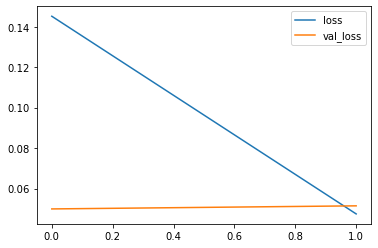

In [96]:
metrics[["loss","val_loss"]].plot()

<AxesSubplot:>

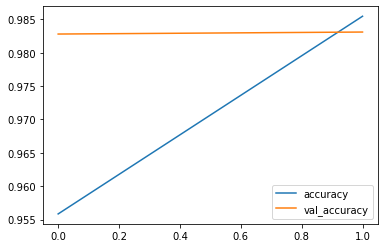

In [97]:
metrics[["accuracy","val_accuracy"]].plot()

In [98]:
model.metrics_names

['loss', 'accuracy']

In [102]:
model.evaluate(X_test,y_test_c,verbose=0)

[0.051438573747873306, 0.9830999970436096]

In [103]:
predictions=model.predict(X_test)

In [109]:
predictions[0]

array([5.2338606e-08, 4.3119787e-08, 1.7930369e-06, 4.4727156e-05,
       4.7411464e-10, 8.0574774e-09, 2.7507322e-12, 9.9995232e-01,
       1.3257065e-07, 1.0937193e-06], dtype=float32)

In [124]:
model.predict(X_test).shape

(10000, 10)

In [122]:
prediction=np.argmax(model.predict(X_test),axis=-1);
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [118]:
prediction

3755

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
print(classification_report(y_test,prediction));

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.96      1.00      0.98       892
           6       1.00      0.97      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [129]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [134]:
confusion_matrix(y_test,prediction)


array([[ 975,    0,    0,    1,    0,    4,    0,    0,    0,    0],
       [   0, 1132,    1,    1,    0,    0,    0,    1,    0,    0],
       [   4,    8, 1007,    5,    1,    0,    0,    7,    0,    0],
       [   0,    0,    2,  995,    0,   12,    0,    0,    1,    0],
       [   0,    0,    2,    0,  969,    0,    0,    1,    1,    9],
       [   1,    0,    0,    2,    0,  888,    1,    0,    0,    0],
       [   8,    4,    0,    0,    3,    6,  933,    0,    4,    0],
       [   1,    2,    5,    5,    0,    1,    0, 1012,    1,    1],
       [   7,    3,    3,    5,    1,    2,    0,    4,  946,    3],
       [   1,    4,    0,    5,    3,   15,    0,    6,    1,  974]])